##  Redes Bayesianas con pgmpy

### Importando la librería pgmpy

In [4]:
!pip install pgmpy

In [5]:
from pgmpy.models import BayesianModel

Creando un modelo PGM y agregamos todos nodos y bordes al modelo.

In [6]:
G=BayesianModel()
G.add_edges_from([('Polucion','Cancer'),('Cancer','Ambos'),('Fumar','Pulmones'),('Fumar','Bronquios'),('Pulmones','Ambos'),('Ambos','Xray'),('Ambos','Disnea'),('Bronquios','Disnea')])

Dibujamos todos los nodos y bordes del modelo.

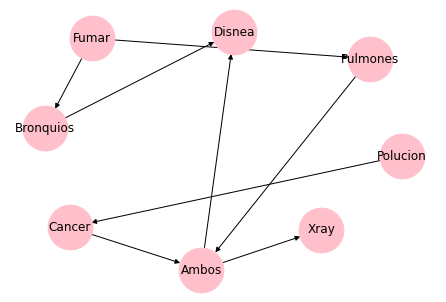

In [7]:
import networkx as nx
import matplotlib.pyplot as plt


nx.draw(G, with_labels=True,node_size=2000,node_color='pink',linewidths=1)
plt.show()

### Tablas de distribuciones de  probabilidad condicional

In [8]:
from pgmpy.factors.discrete.CPD import TabularCPD

In [9]:
cpd_polucion = TabularCPD('Polucion',2,values=[[0.01],[0.99]])

cpd_cancer = TabularCPD('Cancer',2,values=[[0.05,0.01],[0.95,0.99]],evidence=['Polucion'],evidence_card=[2])

cpd_fumar = TabularCPD('Fumar',2,values=[[0.5],[0.5]])

cpd_pulmones = TabularCPD('Pulmones',2,values=[[0.1,0.01],[0.9,0.99]],evidence=['Fumar'],evidence_card=[2])

cpd_bronquios = TabularCPD('Bronquios',2,values=[[0.6,0.3],[0.4,0.7]],evidence=['Fumar'],evidence_card=[2])

cpd_ambos = TabularCPD('Ambos',2,values=[[1,1,1,0],[0,0,0,1]],evidence=['Pulmones','Cancer'],evidence_card=[2,2])

cpd_xray = TabularCPD('Xray',2,values=[[0.98,0.05],[0.02,0.95]],evidence=['Ambos'],evidence_card=[2])

cpd_disnea = TabularCPD('Disnea',2,values=[[0.9,0.7,0.8,0.1],[0.1,0.3,0.2,0.9]],evidence=['Bronquios','Ambos'],evidence_card=[2,2])

In [10]:
G.add_cpds(cpd_polucion, cpd_fumar, cpd_cancer, cpd_pulmones, cpd_bronquios, cpd_ambos, cpd_xray, cpd_disnea)

Verificamos si los cpds son válidos para el modelo.

In [11]:
G.check_model()

True

#### Consultas a la red creada

In [12]:
G.is_active_trail('Polucion', 'Fumar')


False

In [13]:
G.is_active_trail('Polucion', 'Fumar', observed=['Cancer'])

False

In [14]:
G.get_independencies()

(Polucion _|_ Bronquios, Pulmones, Fumar)
(Polucion _|_ Pulmones, Fumar | Bronquios)
(Polucion _|_ Bronquios, Pulmones | Fumar)
(Polucion _|_ Bronquios, Fumar | Pulmones)
(Polucion _|_ Pulmones, Disnea, Bronquios, Xray, Fumar, Ambos | Cancer)
(Polucion _|_ Xray | Ambos)
(Polucion _|_ Pulmones, Bronquios, Xray, Fumar, Ambos | Disnea, Cancer)
(Polucion _|_ Xray | Disnea, Ambos)
(Polucion _|_ Pulmones | Bronquios, Fumar)
(Polucion _|_ Fumar | Bronquios, Pulmones)
(Polucion _|_ Pulmones, Disnea, Xray, Fumar, Ambos | Bronquios, Cancer)
(Polucion _|_ Xray, Disnea | Bronquios, Ambos)
(Polucion _|_ Bronquios | Pulmones, Fumar)
(Polucion _|_ Pulmones, Disnea, Bronquios, Xray, Ambos | Fumar, Cancer)
(Polucion _|_ Bronquios | Xray, Fumar)
(Polucion _|_ Bronquios, Xray, Disnea | Fumar, Ambos)
(Polucion _|_ Disnea, Bronquios, Xray, Fumar, Ambos | Pulmones, Cancer)
(Polucion _|_ Bronquios, Fumar | Xray, Pulmones)
(Polucion _|_ Bronquios, Xray, Disnea, Fumar | Pulmones, Ambos)
(Polucion _|_ Pulmones,

### Dibujando las tablas CPD

In [15]:
for cpd in G.get_cpds():
    print("\nCPD de {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD de Polucion:
+-------------+------+
| Polucion(0) | 0.01 |
+-------------+------+
| Polucion(1) | 0.99 |
+-------------+------+

CPD de Fumar:
+----------+-----+
| Fumar(0) | 0.5 |
+----------+-----+
| Fumar(1) | 0.5 |
+----------+-----+

CPD de Cancer:
+-----------+-------------+-------------+
| Polucion  | Polucion(0) | Polucion(1) |
+-----------+-------------+-------------+
| Cancer(0) | 0.05        | 0.01        |
+-----------+-------------+-------------+
| Cancer(1) | 0.95        | 0.99        |
+-----------+-------------+-------------+

CPD de Pulmones:
+-------------+----------+----------+
| Fumar       | Fumar(0) | Fumar(1) |
+-------------+----------+----------+
| Pulmones(0) | 0.1      | 0.01     |
+-------------+----------+----------+
| Pulmones(1) | 0.9      | 0.99     |
+-------------+----------+----------+

CPD de Bronquios:
+--------------+----------+----------+
| Fumar        | Fumar(0) | Fumar(1) |
+--------------+----------+----------+
| Bronquios(0) | 0.6      |

#### Moralizamos el grafo

In [16]:
moral = G.to_markov_model()
triangulate = moral.triangulate()
junction_tree = triangulate.to_junction_tree()

#### Generamos el grafo moralizado.

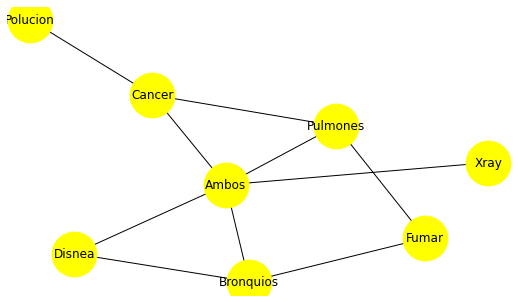

In [17]:
plt.figure(figsize=(7,4))
nx.draw(moral,pos=nx.nx_pydot.graphviz_layout(moral), with_labels=True,node_size=2000,node_color='yellow',linewidths=1)
plt.show()

#### Visualización de la triángulización del grafo. 

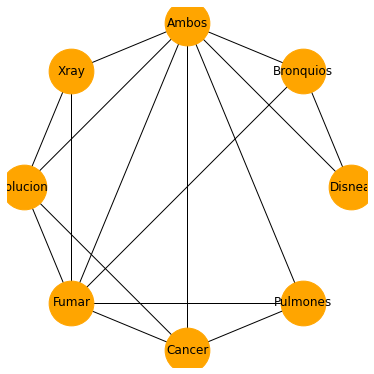

In [18]:
plt.figure(figsize=(5,5))
nx.draw(triangulate,pos=nx.nx_pydot.graphviz_layout(triangulate,prog='circo'), with_labels=True,node_size=2000,node_color='orange',linewidths=1)
plt.show()


### Juntion tree

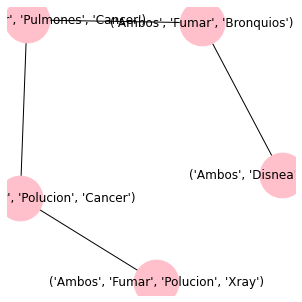

In [19]:
plt.figure(figsize=(4,4))
nx.draw(junction_tree, with_labels=True,node_size=2000,node_color='pink',linewidths=1)
plt.show()

In [20]:
junction_tree.nodes

NodeView((('Ambos', 'Disnea', 'Bronquios'), ('Ambos', 'Fumar', 'Bronquios'), ('Ambos', 'Fumar', 'Pulmones', 'Cancer'), ('Ambos', 'Fumar', 'Polucion', 'Cancer'), ('Ambos', 'Fumar', 'Polucion', 'Xray')))

### Eliminación de variables


Podemos encontrar la probabilidad conjunta de `Cancer = yes, Pulmones = yes, Bronquios = yes`, dada la evidencia de que `Polucion = yes, Xray = yes` usando el algoritmo de transmisión de mensajes.

In [21]:
from pgmpy.inference import VariableElimination

In [22]:
infer=VariableElimination(G)

In [23]:
joint_probability = infer.query(variables=['Cancer','Pulmones','Bronquios'],evidence={'Polucion':0,'Xray':0},joint=True)

Eliminating: Fumar: 100%|██████████| 3/3 [00:00<00:00, 238.64it/s]


In [24]:
print(joint_probability)

+--------------+-------------+-----------+----------------------------------+
| Bronquios    | Pulmones    | Cancer    |   phi(Bronquios,Pulmones,Cancer) |
+==============+=============+===========+==================================+
| Bronquios(0) | Pulmones(0) | Cancer(0) |                           0.0106 |
+--------------+-------------+-----------+----------------------------------+
| Bronquios(0) | Pulmones(0) | Cancer(1) |                           0.2021 |
+--------------+-------------+-----------+----------------------------------+
| Bronquios(0) | Pulmones(1) | Cancer(0) |                           0.1413 |
+--------------+-------------+-----------+----------------------------------+
| Bronquios(0) | Pulmones(1) | Cancer(1) |                           0.1370 |
+--------------+-------------+-----------+----------------------------------+
| Bronquios(1) | Pulmones(0) | Cancer(0) |                           0.0079 |
+--------------+-------------+-----------+----------------------

¿Podemos inferir de la tabla anterior que el `P(Cancer = si, Pulmones = si, Bronquios = si |Polucion = si,Xray = si)` es ?.

In [25]:
# Tu respuesta

¿Qué ocurre si realizas el siguiente cambio al código anterior?.

```
joint_probability = infer.query(variables=['Xray'], evidence={'Fumar': 0, 'Disnea':0, })
print(joint_probability['Xray'])
```

In [26]:
# Tu respuesta

#### Generamos los datos de la red Bayesiana

In [27]:
from pgmpy.sampling import BayesianModelSampling

inference = BayesianModelSampling(G)
df_data = inference.forward_sample(size=10000, return_type='dataframe')
print(df_data)


Generating for node: Xray: 100%|██████████| 8/8 [00:00<00:00, 29.47it/s]


      Fumar  Bronquios  Pulmones  Polucion  Cancer  Ambos  Disnea  Xray
0         1          1         1         1       1      1       1     1
1         1          1         1         1       1      1       1     1
2         1          1         1         1       1      1       1     1
3         1          1         1         1       1      1       1     1
4         0          0         1         1       1      1       0     1
...     ...        ...       ...       ...     ...    ...     ...   ...
9995      1          1         1         1       1      1       1     1
9996      1          1         1         1       1      1       1     1
9997      0          0         1         1       1      1       0     1
9998      0          0         1         1       1      1       0     1
9999      0          0         1         1       1      1       0     1

[10000 rows x 8 columns]


### Aprendemos la estructura TAN

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Building tree: 100%|██████████| 21/21.0 [00:00<00:00, 272.55it/s]


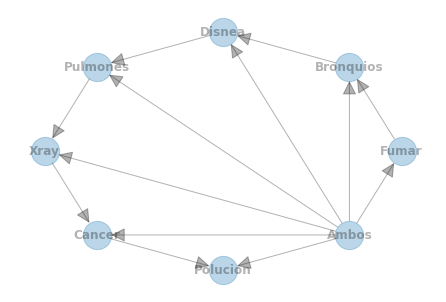

In [28]:
from pgmpy.estimators import TreeSearch

est = TreeSearch(df_data, root_node='Fumar')
dag = est.estimate(estimator_type="tan", class_node="Ambos")
nx.draw_circular(dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold')
plt.show()

#### Parametrización del grafo aprendido a partir de datos

In [29]:
from pgmpy.estimators import BayesianEstimator

modelo = BayesianModel(dag.edges())
modelo.fit(df_data, estimator=BayesianEstimator, prior_type='dirichlet', pseudo_counts=0.1)
modelo.get_cpds()

[<TabularCPD representing P(Fumar:2 | Ambos:2) at 0x7f5c6911e358>,
 <TabularCPD representing P(Bronquios:2 | Ambos:2, Fumar:2) at 0x7f5c74060c18>,
 <TabularCPD representing P(Disnea:2 | Ambos:2, Bronquios:2) at 0x7f5c690d3470>,
 <TabularCPD representing P(Pulmones:2 | Ambos:2, Disnea:2) at 0x7f5c74060160>,
 <TabularCPD representing P(Xray:2 | Ambos:2, Pulmones:2) at 0x7f5c690de8d0>,
 <TabularCPD representing P(Cancer:2 | Ambos:2, Xray:2) at 0x7f5c690cb8d0>,
 <TabularCPD representing P(Polucion:2 | Ambos:2, Cancer:2) at 0x7f5c690cbba8>,
 <TabularCPD representing P(Ambos:2) at 0x7f5c690cba58>]

¿Qué sucede si cambiamos el parámetro ` class_node=""`?. Prueba varios ejemplos. 

In [30]:
# Tu respuesta

### Algoritmo Chow-Liu

Building tree: 100%|██████████| 28/28.0 [00:00<00:00, 362.73it/s]


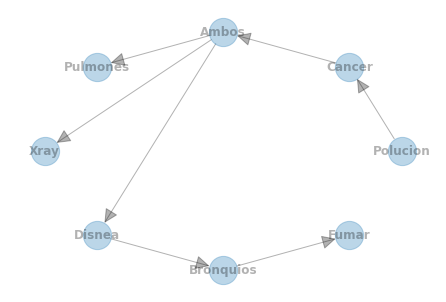

In [31]:
from pgmpy.estimators import TreeSearch

est1 = TreeSearch(df_data, root_node="Polucion")
dag1 = est1.estimate(estimator_type="chow-liu")
nx.draw_circular(dag1, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold')
plt.show()

#### Parametrización del grafo aprendido a partir de datos

In [32]:
from pgmpy.estimators import BayesianEstimator

modelo1 = BayesianModel(dag1.edges())
modelo1.fit(df_data, estimator=BayesianEstimator, prior_type='dirichlet', pseudo_counts=0.1)
modelo.get_cpds()

[<TabularCPD representing P(Fumar:2 | Ambos:2) at 0x7f5c6911e358>,
 <TabularCPD representing P(Bronquios:2 | Ambos:2, Fumar:2) at 0x7f5c74060c18>,
 <TabularCPD representing P(Disnea:2 | Ambos:2, Bronquios:2) at 0x7f5c690d3470>,
 <TabularCPD representing P(Pulmones:2 | Ambos:2, Disnea:2) at 0x7f5c74060160>,
 <TabularCPD representing P(Xray:2 | Ambos:2, Pulmones:2) at 0x7f5c690de8d0>,
 <TabularCPD representing P(Cancer:2 | Ambos:2, Xray:2) at 0x7f5c690cb8d0>,
 <TabularCPD representing P(Polucion:2 | Ambos:2, Cancer:2) at 0x7f5c690cbba8>,
 <TabularCPD representing P(Ambos:2) at 0x7f5c690cba58>]

### Algoritmos de estructuras de aprendizaje

In [33]:
from itertools import combinations

from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling


In [34]:
modelo2 = get_example_model('asia')
muestras = BayesianModelSampling(modelo2).forward_sample(size=int(1e5))
muestras.head()

Generating for node: bronc:   0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:519: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Generating for node: xray: 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]


,smoke,bronc,lung,asia,tub,either,dysp,xray
0,no,no,no,no,no,no,no,no
1,yes,no,no,no,no,no,no,no
2,yes,no,no,no,no,no,no,no
3,yes,yes,yes,no,no,yes,yes,yes
4,no,no,no,no,no,no,no,no


#### Función para evaluar las estructuras del modelo aprendidas

In [35]:
def puntuacion(modelo_estimado, modelo_verdadero):
    tp = 0
    fn = 0
    fp = 0
    tn = 0

    for borde in combinations(modelo_verdadero.nodes(), 2):
        if (borde in modelo_estimado.edges()) and (borde in modelo_verdadero.edges()):
            tp += 1
        elif (borde in modelo_estimado.edges()) and (not (borde in modelo_verdadero.edges())):
            fp += 1
        elif (not(borde in modelo_estimado.edges())) and (borde in modelo_verdadero.edges()):
            fn += 1
        elif (not(borde in modelo_estimado.edges())) and (not(borde in modelo_verdadero.edges())):
            tn += 1
    print(f"Total: {tp+fn+fp+tn}. Positive-verdadero: {tp}, Falso-Negativo: {fn}, Falso-Positivo: {fp}, Verdadero-Negativo: {tn}")
    print(f"Exactitud del borde: {(tp+tn)/(tp+fn+fp+tn)}")

### Aprender la estructura del modelo usando PC

In [36]:
est1 = PC(data=muestras)
modelo_estimado = est1.estimate(variant='stable', max_cond_vars=4)
puntuacion(modelo_estimado, modelo2)

Working for n conditional variables: 4: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/PC.py:366: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

Total: 28. Positive-verdadero: 7, Falso-Negativo: 1, Falso-Positivo: 0, Verdadero-Negativo: 20
Exactitud del borde: 0.9642857142857143


In [37]:
est1 = PC(data=muestras)
modelo_estimado = est1.estimate(variant='orig', max_cond_vars=4)
puntuacion(modelo_estimado, modelo2)

Working for n conditional variables: 4: 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/PC.py:366: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed conditional variables. Exiting")
Working for n conditional variables: 4: 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

Total: 28. Positive-verdadero: 7, Falso-Negativo: 1, Falso-Positivo: 0, Verdadero-Negativo: 20
Exactitud del borde: 0.9642857142857143


¿Cuál es la diferencia entre los valores del argumento `variant`?. ¿Existen otros aparte de `stable` y `orig`?.

In [38]:
# Tu respuesta